In [1]:
import pandas as pd
import numpy as np
import os.path as op


source_folder = '/Users/mrenke/data/ds-dnumrisk/derivatives/phenotype'

In [57]:
rnps = pd.read_csv(op.join(source_folder, 'rnp_sub-format-wise.csv'))
df_rnp = rnps.set_index(['subject', 'format']).unstack('format')
df_rnp = df_rnp.droplevel(0, axis=1, ).rename(columns={'non-symbolic': 'rnp_nonsymb','symbolic': 'rnp_symb'})

math_stuff = pd.read_csv(op.join(source_folder, 'math_skill&confidence&anxiety-means.csv')).set_index('subject')
decode = pd.read_csv(op.join(source_folder, 'decoding_r.csv')).set_index('subject')

In [70]:
panamath_scores = pd.read_csv('/Users/mrenke/data/ds-dnumrisk/add_tables/panamath_AllRunsSummary.csv')
panamath_scores.columns


Index(['Subject ID', 'Test End Date Time', 'Results File Name',
       'Number of Trials', 'Number of Correct Trials', 'Weber Fraction',
       'Percent Correct', 'Average RT', 'Variance RT', 'Average Correct RT',
       'Variance Correct RT', 'Number of Non-RT-Outlier Trials',
       'Number of Correct Non-RT-Outlier Trials',
       'Non-RT-Outlier Weber Fraction', 'Non-RT-Outlier Percent Correct',
       'Average Non-RT-Outlier RT', 'Variance Non-RT-Outlier RT',
       'Average Correct Non-RT-Outlier RT',
       'Variance Correct Non-RT-Outlier RT',
       'Number of Non-RT-Outlier Correct Trials',
       'Average Non-RT-Outlier Correct RT',
       'Variance Non-RT-Outlier Correct RT', 'Unnamed: 22'],
      dtype='object')

In [84]:
df_pana = panamath_scores.rename(mapper={'Subject ID': 'subject'}, axis=1).set_index('subject')[['Number of Trials','Weber Fraction', 'Percent Correct', 'Number of Non-RT-Outlier Trials']]
df_pana.rename(mapper={'Weber Fraction': 'weber_frac'}, inplace=True, axis=1)
df_pana.drop(999, axis=0, inplace=True)
df_pana.sort_index(inplace=True)
df_pana.head() # len(df_pana)   = 64
 

,Number of Trials,weber_frac,Percent Correct,Number of Non-RT-Outlier Trials
subject,,,,
1,264,0.143232,85.984848,263
2,264,0.119873,88.257576,259
3,264,0.349204,72.348485,257
4,264,0.183717,82.196970,257
5,264,0.154192,84.469697,255


In [85]:
df_comb = df_rnp.join(math_stuff).join(decode).join(df_pana['weber_frac'])
df_comb['rnp_symb_dif'] = np.abs(df_comb['rnp_symb'] - 0.55)
df_comb['rnp_nonsymb_dif'] = np.abs(df_comb['rnp_nonsymb'] - 0.55)

df_comb.head()

,rnp_nonsymb,rnp_symb,skill_score,anx_mean,conf_mean,r,weber_frac,rnp_symb_dif,rnp_nonsymb_dif
subject,,,,,,,,,
1,0.279281,0.363823,36.0,1.333333,2.666667,-0.058083,0.143232,0.186177,0.270719
2,0.279444,0.295677,6.0,2.666667,0.666667,0.206071,0.119873,0.254323,0.270556
3,0.215662,0.171333,29.0,1.666667,3.333333,NaN,0.349204,0.378667,0.334338
4,0.356996,0.313972,34.0,4.000000,1.666667,-0.089840,0.183717,0.236028,0.193004
5,0.379446,0.387491,30.0,2.000000,2.333333,-0.023735,0.154192,0.162509,0.170554


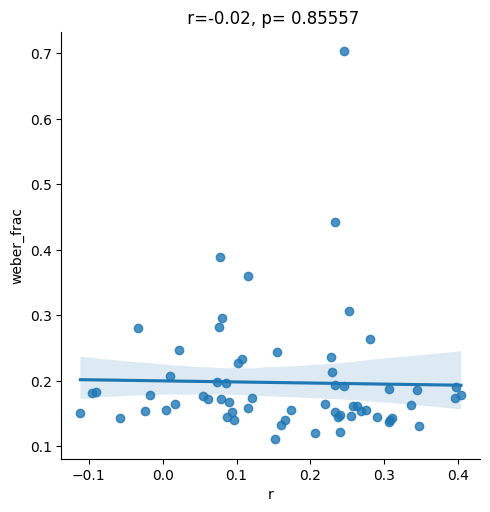

In [86]:
import seaborn as sns
import pingouin

y_var = 'weber_frac' # '4c' # 4b' #
x_var = 'r' # 'conf_mean'
cor = pingouin.corr(df_comb[y_var], df_comb[x_var])
r_ = np.round(cor['r'][0], 2)
p = np.round(cor['p-val'][0], 5)

fig = sns.lmplot(x=x_var, y=y_var, data=df_comb) #, hue='group'
fig.set(title=f' r={r_}, p= {p}')   #ylabel='Anxiety', xlabel='Skill', 